# 逻辑回归模型

逻辑回归是一种广泛使用的分类算法，适用于二分类和多分类问题。尽管名字中带有“回归”，但逻辑回归实际上是一种分类模型。

## 基本原理
逻辑回归通过学习一个线性函数，将输入特征映射到一个概率值。其核心思想是使用逻辑函数（Sigmoid 函数）将线性回归的输出值压缩到 $[0, 1]$ 区间。

### Sigmoid 函数
Sigmoid 函数的公式为：

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

其中：
- $z = w^T x + b$ 是线性回归的输出。
- $w$ 是权重向量，$b$ 是偏置。
- 把整体映射到[0,1]
### 分类决策
逻辑回归的输出是一个概率值 $p$，表示样本属于正类的概率。分类决策规则为：
- 如果 $p \geq 0.5$，预测为正类。
- 如果 $p < 0.5$，预测为负类。
- 提高正确结果的概率,降低错误结果的概率

## 损失函数
逻辑回归使用对数损失函数（Log Loss）来优化模型参数，其定义为：

$$ L = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

其中：
- $n$ 是样本数量。
- $y_i$ 是第 $i$ 个样本的真实标签（0 或 1）。
- $\hat{y}_i$ 是第 $i$ 个样本的预测概率。

## 优点
- 简单易用，计算效率高。
- 输出概率值，具有良好的可解释性。
- 适用于线性可分的数据。

## 缺点
- 对于非线性数据表现较差，需要引入特征工程或使用核方法。
- 对异常值较为敏感。

## 适用场景
- 二分类问题，例如垃圾邮件检测、疾病预测等。
- 多分类问题（通过 One-vs-Rest 或 Softmax 实现）。

# 对数似然损失

对数似然损失（Log-Loss）是逻辑回归模型中常用的损失函数，用于衡量模型预测的概率分布与真实标签之间的差异。

## 定义
对数似然损失的公式为：

$$ L = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

其中：
- $n$ 是样本数量。
- $y_i$ 是第 $i$ 个样本的真实标签（0 或 1）。
- $\hat{y}_i$ 是第 $i$ 个样本的预测概率，表示样本属于正类的概率。

## 特点
- 当预测概率 $\hat{y}_i$ 越接近真实标签 $y_i$ 时，对数似然损失越小。
- 对数似然损失对错误分类的惩罚较大，尤其是当预测概率与真实标签相差较大时。

## 优点
- 能够有效地处理概率输出，适用于分类问题。
- 对模型的概率预测能力进行评估，而不仅仅是分类准确率。

## 缺点
- 对异常值较为敏感，可能需要对数据进行预处理。

## 应用场景
- 二分类问题，例如垃圾邮件检测、疾病预测等。
- 多分类问题（通过扩展到多分类对数损失）。

In [257]:
from sklearn.linear_model import LogisticRegression

 sklearn.linear_model。LogisticRegression(solver='liblinear',penalty='l2',C=1.0)

# LogisticRegression 参数说明

`LogisticRegression` 是 `scikit-learn` 中的逻辑回归模型类，用于解决分类问题。以下是一些常用参数的说明：

## 参数
- `solver='liblinear'`：
  - 指定优化算法。
  - `liblinear` 是一个适用于小型数据集的优化算法，支持 L1 和 L2 正则化。
  - 其他可选值包括 `newton-cg`、`lbfgs`、`sag` 和 `saga`，适用于不同规模的数据和正则化类型。
  - sag 和 saga对于大型数据集更快

- `penalty='l2'`：
  - 指定正则化类型。
  - `l2` 表示使用 L2 正则化（岭回归）。
  - 如果选择 `liblinear` 或 `saga` 作为求解器，也可以设置为 `l1`（L1 正则化）。

- `C=1.0`：
  - 正则化强度的倒数，必须为正数。
  - 较小的 `C` 值表示较强的正则化，较大的 `C` 值表示较弱的正则化。

## 示例
```python
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型
model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

# 拟合模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)
```

通过调整这些参数，可以优化逻辑回归模型的性能，适应不同的数据集和任务需求。

In [258]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# 1. 加载数据
data = load_breast_cancer()
X, y = data.data, data.target

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# 3. 数据标准化（逻辑回归需要特征缩放）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 训练逻辑回归模型
model = LogisticRegression(max_iter=1000)  # 增加迭代次数确保收敛
model.fit(X_train_scaled, y_train)

# 5. 预测
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # 正类（Benign）概率

# 6. 计算指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)     # 默认以1（Benign）为正向类
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# 7. 输出结果
print(f"准确率(Accuracy): {accuracy:.4f}")
print(f"召回率(Recall): {recall:.4f}")
print(f"精确率(Precision): {precision:.4f}")
print(f"F1分数(F1): {f1:.4f}")
print(f"AUC值: {auc:.4f}")

准确率(Accuracy): 0.9737
召回率(Recall): 1.0000
精确率(Precision): 0.9565
F1分数(F1): 0.9778
AUC值: 0.9905


# 逻辑回归中的 solver 参数

在逻辑回归中，`solver` 参数用于指定优化算法，不同的 `solver` 适用于不同的数据规模和问题类型。以下是常用 `solver` 的说明：

## 1. **`lbfgs`**
- **全称**：Limited-memory Broyden–Fletcher–Goldfarb–Shanno
- **特点**：
  - 一种拟牛顿法优化算法。
  - 适用于中小规模数据集。
  - 支持多分类问题（`multi_class='multinomial'`）。
- **优点**：
  - 收敛速度快，计算效率高。
- **缺点**：
  - 对大规模数据集可能不适用。

---

## 2. **`newton-cg`**
- **全称**：Newton Conjugate Gradient
- **特点**：
  - 使用牛顿法结合共轭梯度优化。
  - 适用于中小规模数据集。
  - 支持多分类问题（`multi_class='multinomial'`）。
- **优点**：
  - 对于高维数据表现良好。
- **缺点**：
  - 计算 Hessian 矩阵的代价较高。

---

## 3. **`sag`**
- **全称**：Stochastic Average Gradient
- **特点**：
  - 一种随机优化算法。
  - 适用于大规模数据集。
  - 仅支持 L2 正则化。
- **优点**：
  - 对大规模数据集的收敛速度较快。
- **缺点**：
  - 对稀疏数据的支持较差。

---

## 4. **`saga`**
- **全称**：Stochastic Average Gradient Augmented
- **特点**：
  - `sag` 的改进版本。
  - 适用于大规模数据集。
  - 支持 L1 和 L2 正则化。
- **优点**：
  - 能够处理稀疏数据。
- **缺点**：
  - 对小规模数据集可能表现不佳。

---

## 5. **`liblinear`**
- **特点**：
  - 基于坐标下降法的优化算法。
  - 适用于小规模数据集。
  - 支持 L1 和 L2 正则化。
- **优点**：
  - 对稀疏数据表现良好。
- **缺点**：
  - 不支持多分类问题（`multi_class='multinomial'`）。

---

### 总结
| Solver      | 适用场景                  | 支持正则化 | 支持多分类 | 优点                     |
|-------------|---------------------------|------------|------------|--------------------------|
| `lbfgs`     | 中小规模数据集            | L2         | 是         | 收敛速度快，效率高       |
| `newton-cg` | 中小规模数据集            | L2         | 是         | 高维数据表现良好         |
| `sag`       | 大规模数据集              | L2         | 是         | 大规模数据收敛速度快     |
| `saga`      | 大规模数据集，稀疏数据    | L1, L2     | 是         | 支持稀疏数据             |
| `liblinear` | 小规模数据集，稀疏数据    | L1, L2     | 否         | 对稀疏数据表现良好       |

### 注意事项
- 根据数据规模和特征选择合适的 `solver`。
- 对于多分类问题，推荐使用 `lbfgs`、`newton-cg` 或 `saga`。
- 对于大规模数据集，推荐使用 `sag` 或 `saga`。

In [259]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import ssl
#1数据读取
ssl._create_default_https_context=ssl._create_unverified_context

names=['Sample code number','Clump Thickness','Uniformity of size','Unoformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",names=names)
data.head()

,Sample code number,Clump Thickness,Uniformity of size,Unoformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [260]:
#2数据处理
data = data.replace(to_replace="?", value=np.nan)#?替换为空值
data = data.dropna()
x=data.iloc[:,1:10]
x.head()

,Clump Thickness,Uniformity of size,Unoformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [261]:
y=data["Class"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [262]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=22,test_size=0.2)

In [263]:
#3标准化
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.fit_transform(X_test)

这行代码的作用是对训练数据 `X_train` 进行标准化处理。

### 详细解释：
1. **`transfer.fit_transform()`**：
   - `fit_transform()` 是 `scikit-learn` 中的一个方法，结合了 `fit()` 和 `transform()` 的功能。
   - **`fit()`**：计算训练数据的均值和标准差，用于后续的标准化。
   - **`transform()`**：使用计算得到的均值和标准差，将数据进行标准化处理。

2. **标准化的目的**：
   - 标准化是将数据的每个特征缩放到均值为 0、标准差为 1 的分布。
   - 公式为：
     $$ X_{scaled} = \frac{X - \mu}{\sigma} $$
     其中：
     - $X$ 是原始数据。
     - $\mu$ 是特征的均值。
     - $\sigma$ 是特征的标准差。

3. **为什么需要标准化**：
   - 逻辑回归等机器学习算法对特征的尺度敏感。如果特征的取值范围差异较大，可能会导致模型的训练过程不稳定或收敛缓慢。
   - 标准化可以加速模型的收敛，提高训练效果。

4. **作用范围**：
   - `fit_transform()` 只对训练数据 `X_train` 进行拟合和转换。
   - 对测试数据 `X_test`，需要使用相同的均值和标准差进行转换（即使用 `transfer.transform(X_test)`），以确保训练集和测试集的特征分布一致。

### 示例：


In [264]:
from sklearn.preprocessing import StandardScaler

# 创建标准化器
scaler = StandardScaler()

# 对训练数据进行标准化
X_train_scaled = scaler.fit_transform(X_train)

# 对测试数据进行标准化（使用训练数据的均值和标准差）
X_test_scaled = scaler.transform(X_test)



通过标准化，模型可以更好地处理不同尺度的特征，从而提高预测性能。

In [265]:
#4机器学习
estimator=LogisticRegression()
estimator.fit(X_train,y_train)

LogisticRegression()

In [266]:
#5模型评估
ret=estimator.score(X_test,y_test)#准确率
print('准确率为:\n',ret)
y_pre=estimator.predict(X_test)#预测值
print('预测值为:\n',y_pred)

准确率为:
 0.9854014598540146
预测值为:
 [0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1
 1 1 1]


# 分类评估方法：混淆矩阵、准确率和召回率

在分类问题中，评估模型性能的常用方法包括：

## 混淆矩阵
混淆矩阵是一个表格，用于描述分类模型在测试数据上的表现。它包括以下四个指标：
- **TP（True Positive）**：预测为正类且实际为正类的样本数。
- **TN（True Negative）**：预测为负类且实际为负类的样本数。
- **FP（False Positive）**：预测为正类但实际为负类的样本数。
- **FN（False Negative）**：预测为负类但实际为正类的样本数。

## 准确率（Accuracy）
准确率是正确分类的样本数占总样本数的比例，公式为：

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

## 召回率（Recall）
召回率是正确预测为正类的样本数占实际正类样本数的比例，公式为：

$$ Recall = \frac{TP}{TP + FN} $$

## 应用场景
- **准确率**适用于类别分布均衡的场景。
- **召回率**适用于对正类样本的识别尤为重要的场景，例如疾病检测。

# 精确率（Precision）

精确率是分类模型中常用的评估指标之一，表示预测为正类的样本中实际为正类的比例。

## 公式
$$ Precision = \frac{TP}{TP + FP} $$

其中：
- **TP（True Positive）**：预测为正类且实际为正类的样本数。
- **FP（False Positive）**：预测为正类但实际为负类的样本数。

## 特点
- 精确率关注的是预测为正类的样本中有多少是正确的。
- 在关注错误正类（假阳性）代价较高的场景中，精确率是一个重要的指标。

## 应用场景
- **垃圾邮件检测**：预测为垃圾邮件的邮件中实际是垃圾邮件的比例。
- **疾病诊断**：预测为患病的患者中实际患病的比例。

混淆矩阵:
[[88  1]
 [ 1 47]]
精确率: 0.9888
准确率: 0.9854
召回率: 0.9888
F1-Score: 0.9888
              precision    recall  f1-score   support

          良性       0.99      0.99      0.99        89
          恶性       0.98      0.98      0.98        48

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

FPR（假正率）: [0. 1. 1.]
TPR（真正率）: [0. 0. 1.]
阈值（Thresholds）: [inf  4.  2.]
AUC 值: 0.0000
AUC 指标: 0.9840


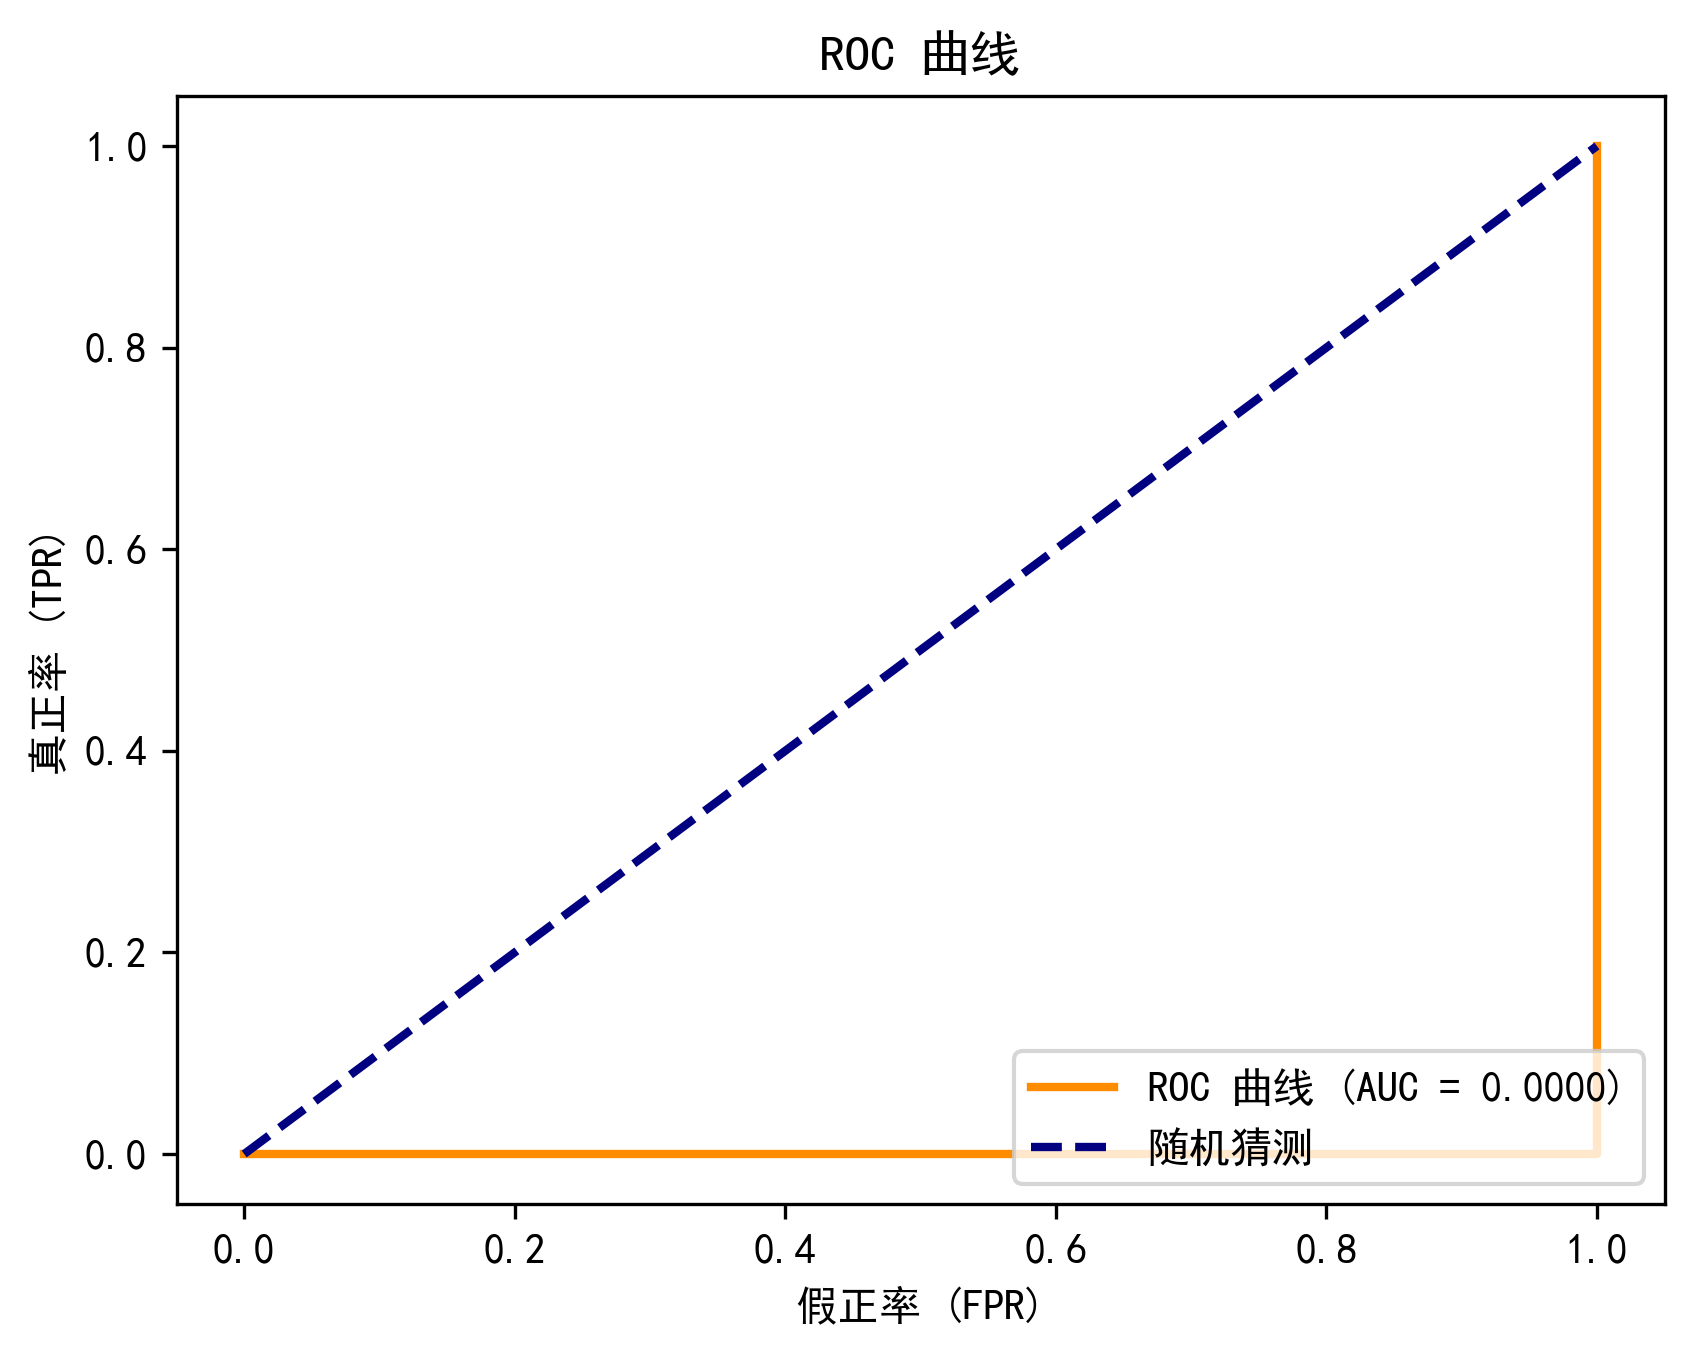

In [267]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score,f1_score,classification_report,roc_curve, auc
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
plt.rcParams['figure.dpi']=300
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pre)
print("混淆矩阵:")
print(cm)

# 计算精确率=预测结果为正例样本中真实为正例的比例 88/(88+1)
# 若为二分类且标签为2/4，需指定pos_label
# 指定正类标签为4（恶性肿瘤），如果你想要2为正类则改为pos_label=2
precision = precision_score(y_test, y_pre, pos_label=2)
print(f"精确率: {precision:.4f}")

# 计算准确率=预测结果为正例样本中真实为正例的比例 88+1/(88+1+47+1)
accuracy = accuracy_score(y_test, y_pre)
print(f"准确率: {accuracy:.4f}")

# 计算召回率=真实为正例的样本中预测结果为正的比例 
# 若为二分类且标签为2/4，需指定pos_label
# 指定正类标签为4（恶性肿瘤），如果你想要2为正类则改为pos_label=2
recall = recall_score(y_test, y_pre, pos_label=2)
print(f"召回率: {recall:.4f}")
#f1_score
f1_score=f1_score(y_test, y_pre,pos_label=2)
print(f"F1-Score: {f1_score:.4f}")
#分类评估报告
ret=classification_report(y_test,y_pre,labels=(2,4),target_names=("良性","恶性"))
print(ret)



# 计算 TPR 和 FPR


fpr, tpr, thresholds = roc_curve(y_test, y_test, pos_label=2)

# 输出结果
print("FPR（假正率）:", fpr)
print("TPR（真正率）:", tpr)
print("阈值（Thresholds）:", thresholds)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



# 计算 AUC 值
y_test=np.where(y_test>2.5,1,0)
roc=roc_auc_score(y_test,y_pre)
roc_auc = auc(fpr, tpr)
print(f"AUC 值: {roc_auc:.4f}")
print(f"AUC 指标: {roc:.4f}")
# 绘制 ROC 曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC 曲线 (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='随机猜测')
plt.xlabel('假正率 (FPR)')
plt.ylabel('真正率 (TPR)')
plt.title('ROC 曲线')
plt.legend(loc='lower right')
plt.show()

`classification_report` 是 `scikit-learn` 提供的一个函数，用于生成分类模型的评估报告。

### 详细解释：
1. **功能**：
   - `classification_report` 输出一个文本报告，包含分类模型的主要评估指标，如精确率（Precision）、召回率（Recall）、F1 分数（F1-Score）以及支持样本数（Support）。
   - 这些指标按每个类别分别计算，并提供总体的加权平均值。

2. **常用参数**：
   - `y_true`：真实标签。
   - `y_pred`：模型预测的标签。
   - `labels`：指定需要评估的类别标签。
   - `target_names`：为类别标签指定对应的名称。
   - `output_dict`：如果设置为 `True`，返回一个字典而不是字符串报告。

3. **输出内容**：
   - **Precision**：预测为某类别的样本中实际属于该类别的比例。
   - **Recall**：实际属于某类别的样本中被正确预测为该类别的比例。
   - **F1-Score**：精确率和召回率的调和平均值。
   - **Support**：每个类别的真实样本数。

4. **适用场景**：
   - 用于快速评估分类模型的性能，尤其是在多分类任务中。
   - 提供每个类别的详细指标，便于分析模型在不同类别上的表现。




# F1 分数（F1-Score）

F1 分数是分类模型中常用的评估指标之一，是精确率（Precision）和召回率（Recall）的调和平均值。

## 公式
$$ F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} $$

其中：
- **Precision**：精确率，预测为正类的样本中实际为正类的比例。
- **Recall**：召回率，实际为正类的样本中预测为正类的比例。

## 特点
- F1 分数综合了精确率和召回率，适用于类别不平衡的场景。
- 当精确率和召回率的权重相等时，F1 分数是一个理想的评估指标。

## 应用场景
- **疾病诊断**：在疾病检测中，既需要高精确率（减少误诊）又需要高召回率（减少漏诊）。
- **垃圾邮件检测**：在垃圾邮件分类中，平衡误报和漏报的影响。

# TPR（真正率）和 FPR（假正率）

TPR 和 FPR 是分类模型性能评估的重要指标，通常用于绘制 ROC 曲线。

## 定义
- **TPR（True Positive Rate）**：真正率，表示实际为正类的样本中被正确预测为正类的比例。
  $$ TPR = \frac{TP}{TP + FN} $$

- **FPR（False Positive Rate）**：假正率，表示实际为负类的样本中被错误预测为正类的比例。
  $$ FPR = \frac{FP}{FP + TN} $$

其中：
- **TP（True Positive）**：预测为正类且实际为正类的样本数。
- **FN（False Negative）**：预测为负类但实际为正类的样本数。
- **FP（False Positive）**：预测为正类但实际为负类的样本数。
- **TN（True Negative）**：预测为负类且实际为负类的样本数。

## 应用场景
- **TPR**：衡量模型对正类样本的识别能力，适用于对正类样本识别要求较高的场景，例如疾病检测。
- **FPR**：衡量模型对负类样本的误判率，适用于对误报代价较高的场景，例如垃圾邮件过滤。

## 关系
- TPR 和 FPR 通常用于绘制 ROC 曲线，帮助选择最佳的分类阈值。

# ROC 曲线和 AUC 指标

ROC（Receiver Operating Characteristic）曲线是评估分类模型性能的重要工具，AUC（Area Under Curve）是 ROC 曲线下的面积，用于量化模型的分类能力。

## ROC 曲线
- ROC 曲线通过绘制 TPR（真正率）与 FPR（假正率）的关系，展示模型在不同分类阈值下的性能。
- 横轴：FPR（假正率），表示负类样本中被错误预测为正类的比例。
- 纵轴：TPR（真正率），表示正类样本中被正确预测为正类的比例。

## AUC 指标
- AUC 是 ROC 曲线下的面积，取值范围为 [0, 1]。
- AUC 越接近 1，模型的分类性能越好。
- AUC = 0.5 表示模型没有分类能力，相当于随机猜测。

## 应用场景
- ROC 曲线和 AUC 常用于评估二分类模型的性能，尤其是在类别不平衡的情况下。
- 帮助选择最佳分类阈值。

In [268]:
print(y_test)

[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0]
